In [7]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn import metrics 
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import RepeatedStratifiedKFold, StratifiedKFold, RepeatedKFold
from sklearn.base import clone
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer

plt.rcParams.update({'font.size': 12})

In [8]:
path=r'/home/ludovico/ML-project/data/cup/ML-CUP23-'
train_set = pd.read_csv(path+'TR.csv',skiprows=7, header=None, delimiter=',', dtype=str)

input=train_set[train_set.columns[1:-3]]
target=train_set[train_set.columns[-3:]]


In [30]:
x_train, x_test, y_train, y_test = train_test_split(input, target, test_size=0.2, random_state=0, shuffle=True)

x=np.array(y_train[11].astype(np.float64))
y=np.array(y_train[12].astype(np.float64))
z=np.array(y_train[13].astype(np.float64))

x_train=x_train.astype(np.float64)
y_train=y_train.astype(np.float64)
x_test=x_test.astype(np.float64)
y_test=y_test.astype(np.float64)

def MEE(x, y):
    return np.mean(np.linalg.norm(x - y, 2, axis=1))


Fitting 50 folds for each of 39 candidates, totalling 1950 fits
[CV 4/50] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.814) total time=   0.0s[CV 2/50] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.810) total time=   0.0s
[CV 1/50] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.823) total time=   0.0s

[CV 3/50] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.484) total time=   0.0s
[CV 5/50] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.675) total time=   0.0s
[CV 6/50] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.444) total time=   0.0s
[CV 7/50] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.787) total time=   0.0s
[CV 8/50] END metric=l1, n_neighbors=1, weights=distance;, score=(train=-0.000, test=-3.685) total time=   0.0s
[CV 9/50] END metric=l1, n_neighbors=1, 

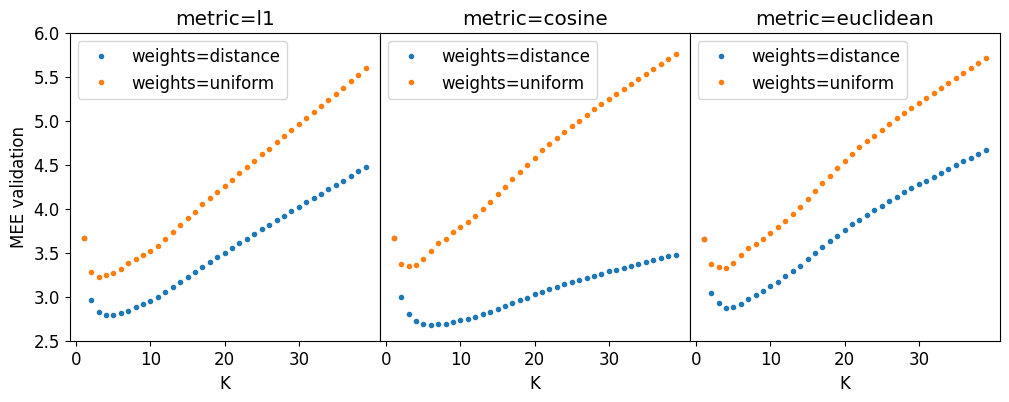

In [15]:
n_neigh=np.arange(1,40,1)
plt.figure(1,(12,4))

w=['distance', 'uniform']
for weights in w:

    mis=['l1','cosine','euclidean']
    for i,metric in enumerate(mis):
        parameters_KNN = {
        'n_neighbors': n_neigh,
        'weights': [weights],
        'metric': [metric]
    }
        grid_search_KNN = GridSearchCV(
            estimator=KNeighborsRegressor(),
            param_grid=parameters_KNN,
            refit=True,
            cv=RepeatedKFold(n_splits=5, n_repeats=10, random_state=0),
            n_jobs=-1,
            return_train_score = True,
            verbose=3,
            scoring=make_scorer(MEE, greater_is_better=False),
        )
            
        KNN=grid_search_KNN.fit(x_train, y_train)
        cv_results_df = pd.DataFrame(grid_search_KNN.cv_results_)
        error=cv_results_df['mean_test_score'].values
        plt.subplot(1,3,i+1)
        plt.subplots_adjust(wspace=0)
        if i==0:
            plt.ylabel('MEE validation')
        else:
            plt.yticks([])
        plt.title('metric='+metric)
        plt.errorbar(n_neigh,-error,label='weights='+weights,marker='.',linestyle='')
        plt.xlabel('K')
        plt.ylim(2.5,6)
        plt.xticks([0,10,20,30])
        plt.legend()

plt.show()

In [25]:

n_neigh=np.arange(1,20,1)
parameters_KNN = {
    'n_neighbors': n_neigh,
    'weights': ('uniform','distance'),
    'metric': ('cosine','minkowski'),
    'p':[1,2,3,5,7]
}      
# with GridSearch
grid_search_KNN = GridSearchCV(
    estimator=KNeighborsRegressor(),
    param_grid=parameters_KNN,
    refit=True,
    cv=RepeatedKFold(n_splits=5, n_repeats=5, random_state=0),
    n_jobs=-1,
    return_train_score = True,
    scoring=make_scorer(MEE, greater_is_better=False),
)
KNN=grid_search_KNN.fit(x_train, y_train)

In [26]:
cv_results_df = pd.DataFrame(KNN.cv_results_)
best_model_index=KNN.best_index_

print('best params',KNN.best_params_) 

val_loss=cv_results_df['mean_test_score'][best_model_index]
val_std=cv_results_df['std_test_score'][best_model_index]
train_loss=cv_results_df['mean_train_score'][best_model_index]
train_std=cv_results_df['std_train_score'][best_model_index]
print('Train loss:',train_loss,'+/-', train_std)
print('Validation loss:',val_loss,'+/-', val_std)

cv_results_df

best params {'metric': 'cosine', 'n_neighbors': 6, 'p': 9, 'weights': 'distance'}
Train loss: -8.854872931476768e-14 +/- 2.828673543102334e-15
Validation loss: -2.700462356870592 +/- 0.170798435333066


,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_metric,param_n_neighbors,param_p,param_weights,params,split0_test_score,...,split17_train_score,split18_train_score,split19_train_score,split20_train_score,split21_train_score,split22_train_score,split23_train_score,split24_train_score,mean_train_score,std_train_score
0,0.004677,0.003910,0.005923,0.002035,cosine,1,9,uniform,"{'metric': 'cosine', 'n_neighbors': 1, 'p': 9,...",-3.802019,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
1,0.005129,0.004354,0.007808,0.002992,cosine,1,9,distance,"{'metric': 'cosine', 'n_neighbors': 1, 'p': 9,...",-3.802019,...,-6.261385e-17,-5.428718e-17,-6.383782e-17,-5.289940e-17,-6.538941e-17,-3.624605e-17,-6.383782e-17,-4.318495e-17,-5.231153e-17,1.012862e-17
2,0.004335,0.001906,0.007732,0.004836,cosine,1,15,uniform,"{'metric': 'cosine', 'n_neighbors': 1, 'p': 15...",-3.802019,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
3,0.004181,0.002190,0.007323,0.003401,cosine,1,15,distance,"{'metric': 'cosine', 'n_neighbors': 1, 'p': 15...",-3.802019,...,-6.261385e-17,-5.428718e-17,-6.383782e-17,-5.289940e-17,-6.538941e-17,-3.624605e-17,-6.383782e-17,-4.318495e-17,-5.231153e-17,1.012862e-17
4,0.004699,0.002116,0.008034,0.004566,cosine,2,9,uniform,"{'metric': 'cosine', 'n_neighbors': 2, 'p': 9,...",-3.500691,...,-1.830954e+00,-1.824283e+00,-1.787400e+00,-1.807235e+00,-1.790399e+00,-1.857332e+00,-1.842463e+00,-1.839401e+00,-1.815783e+00,2.927343e-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
147,0.003387,0.003488,0.011299,0.006251,minkowski,18,15,distance,"{'metric': 'minkowski', 'n_neighbors': 18, 'p'...",-4.294442,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
148,0.003294,0.002499,0.009775,0.005352,minkowski,19,9,uniform,"{'metric': 'minkowski', 'n_neighbors': 19, 'p'...",-5.067305,...,-4.592673e+00,-4.764636e+00,-4.718832e+00,-4.741541e+00,-4.638978e+00,-4.595625e+00,-4.692489e+00,-4.758462e+00,-4.693632e+00,5.610751e-02
149,0.002539,0.000772,0.009544,0.004488,minkowski,19,9,distance,"{'metric': 'minkowski', 'n_neighbors': 19, 'p'...",-4.319614,...,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,-0.000000e+00,0.000000e+00,0.000000e+00
150,0.003156,0.001382,0.008681,0.002877,minkowski,19,15,uniform,"{'metric': 'minkowski', 'n_neighbors': 19, 'p'...",-5.086460,...,-4.622135e+00,-4.793116e+00,-4.770480e+00,-4.768733e+00,-4.696704e+00,-4.636069e+00,-4.737713e+00,-4.798049e+00,-4.737358e+00,5.649613e-02


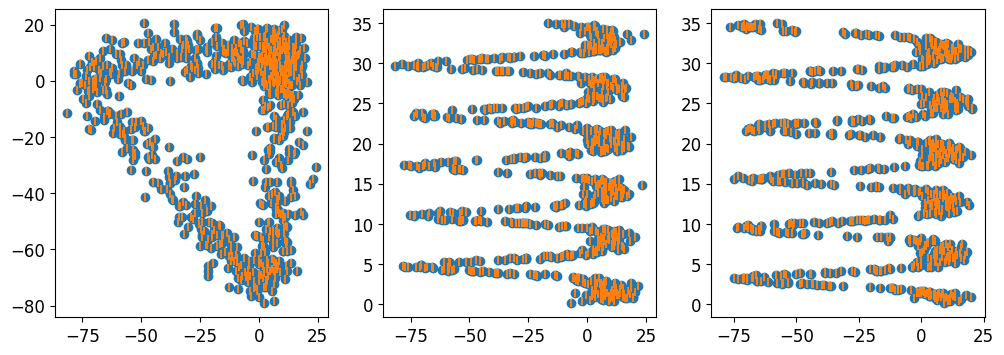

In [36]:
y_pred=KNN.predict(x_train)
plt.figure(1,figsize=(12,4))
plt.subplot(131)
plt.scatter(x,y)
plt.scatter(y_pred[:,0],y_pred[:,1],marker='|')
plt.subplot(132)
plt.scatter(x,z)
plt.scatter(y_pred[:,0],y_pred[:,2],marker='|')
plt.subplot(133)
plt.scatter(y,z)
plt.scatter(y_pred[:,1],y_pred[:,2],marker='|')
plt.show()